# Import Dependencies

In [2]:
!pip install -q ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 19.6 MB/s eta 0:00:00a 0:00:01


# Import Modules

In [5]:
import os
import yaml
import pandas as pd
import matplotlib.pyplot as plt
import random
import cv2

from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


# Load The Dataset

In [6]:
# ==========================================================
# 1) DATASET PATH (KAGGLE INPUT)
# ==========================================================
DATASET_PATH = "/kaggle/input/road-detection-imgs-and-labels/dataset"

TRAIN_DIR = os.path.join(DATASET_PATH, "train/images")
VAL_DIR   = os.path.join(DATASET_PATH, "val/images")
TEST_DIR  = os.path.join(DATASET_PATH, "test/images")

print("✅ Dataset Path:", DATASET_PATH)
print("Train Exists:", os.path.exists(TRAIN_DIR))
print("Val Exists:", os.path.exists(VAL_DIR))
print("Test Exists:", os.path.exists(TEST_DIR))

✅ Dataset Path: /kaggle/input/road-detection-imgs-and-labels/dataset
Train Exists: True
Val Exists: True
Test Exists: True


# Data Preprocessing

In [7]:
# ==========================================================
# 2) CREATE FIXED YAML IN /kaggle/working/
# ==========================================================
NEW_YAML_PATH = "/kaggle/working/road_detection.yaml"

data = {
    "path": DATASET_PATH,
    "train": "train/images",
    "val": "val/images",
    "test": "test/images",
    "nc": 9,
    "names": [
        "Trafic Light Signal",
        "Stop Signal",
        "Speedlimit Signal",
        "Crosswalk Signal",
        "Crosswalk",
        "Pedestrian",
        "Bus",
        "Car",
        "Truck"
    ]
}

with open(NEW_YAML_PATH, "w") as f:
    yaml.dump(data, f, default_flow_style=False)

print("✅ YAML saved at:", NEW_YAML_PATH)

✅ YAML saved at: /kaggle/working/road_detection.yaml


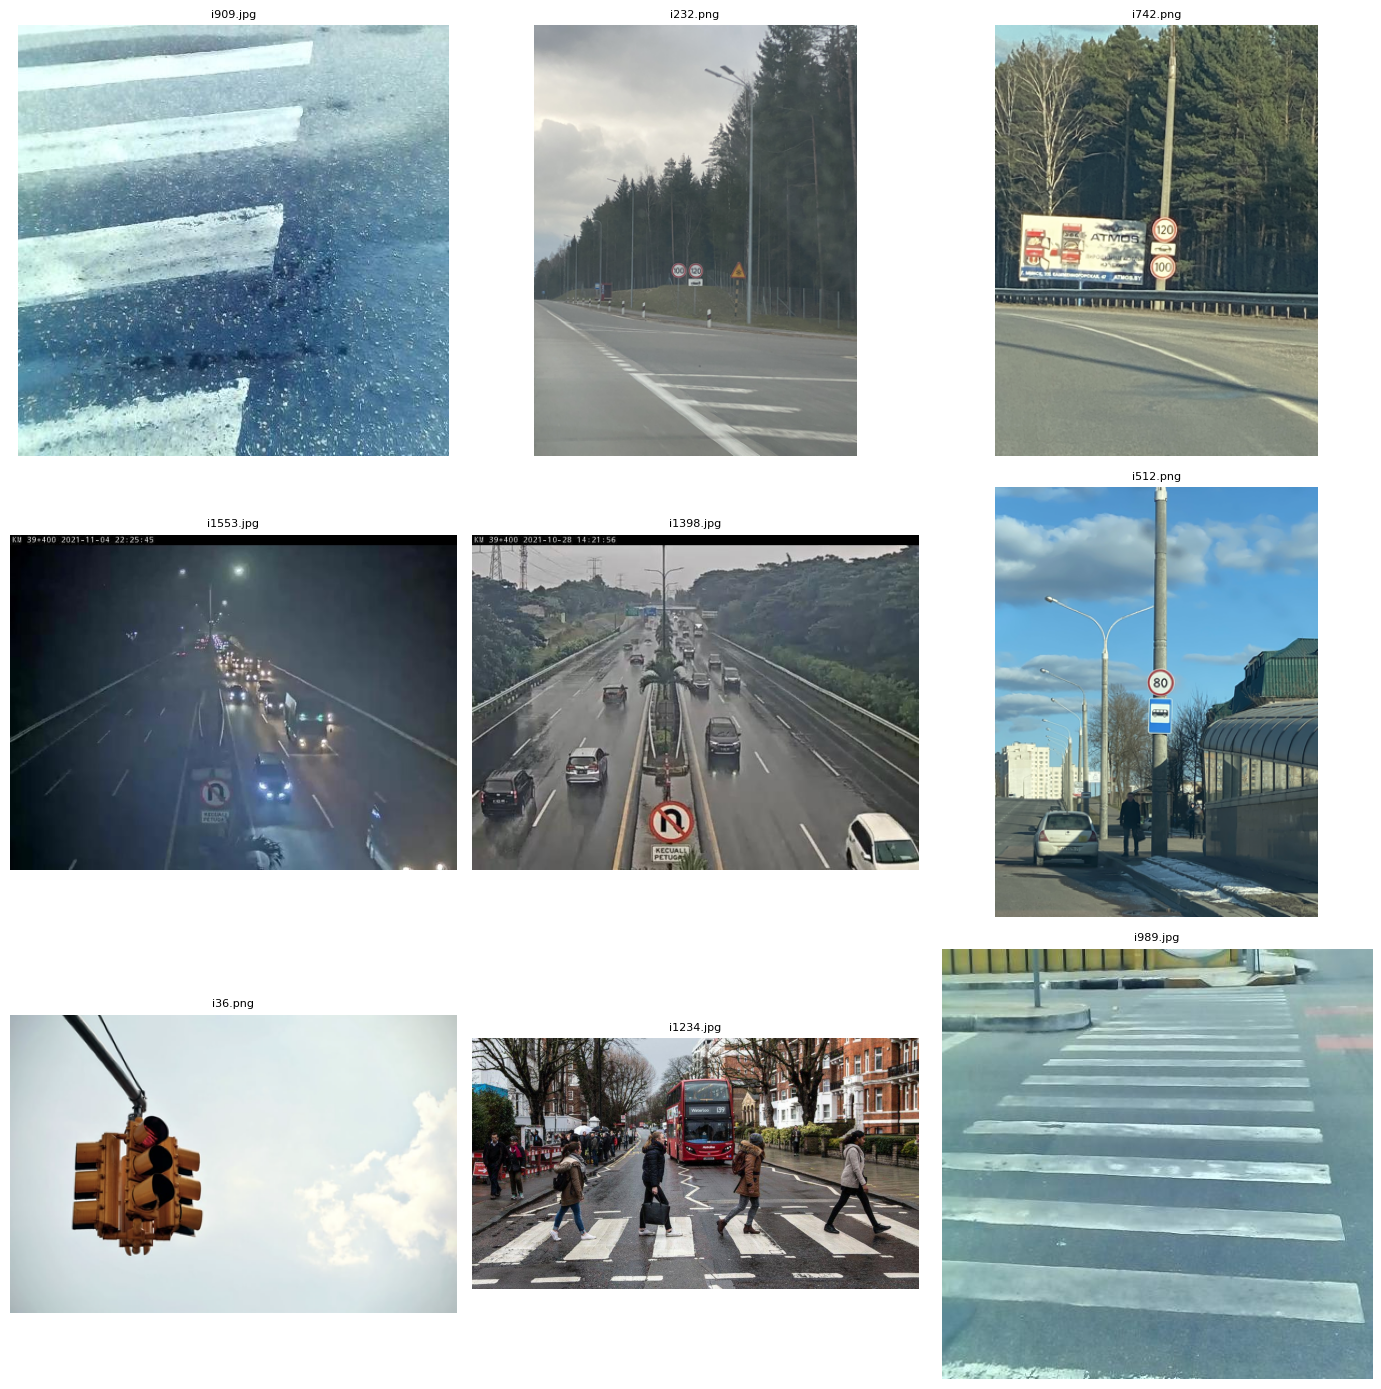

In [12]:
train_images = os.listdir(TRAIN_DIR)
sample_train_imgs = random.sample(train_images, 9)

plt.figure(figsize=(14, 14))

for i, img_name in enumerate(sample_train_imgs):
    img_path = os.path.join(TRAIN_DIR, img_name)

    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.subplot(3, 3, i+1)
    plt.imshow(img)
    plt.title(img_name, fontsize=8)
    plt.axis("off")

plt.tight_layout()
plt.show()


# Model Building

In [ ]:
# ==========================================================
# LOAD YOLO11m DETECTION MODEL
# ==========================================================
model = YOLO("yolo11m.pt")
print("✅ YOLO11m Detection model loaded!")

✅ YOLO11m Detection model loaded!


In [14]:
# ==========================================================
# 4) TRAIN MODEL
# ==========================================================
results = model.train(
    data=NEW_YAML_PATH,
    epochs=50,  
    imgsz=640,
    batch=16,
    device=0,
    cache=True,
    name="road_detection_yolo11m",
    exist_ok=True
)

print("✅ Training Completed!")

Ultralytics 8.4.14 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 14913MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=True, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/road_detection.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=50, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11m.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=road_detection_yolo11m, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience

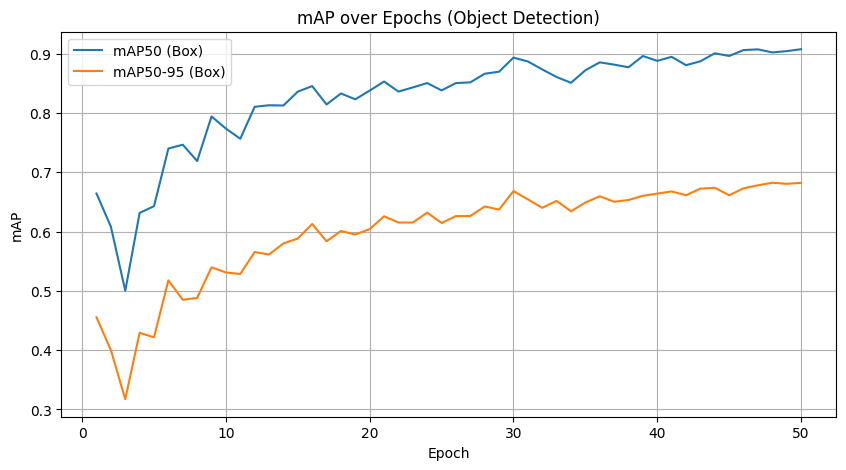

In [15]:
# ==========================================================
# 5) PLOT TRAINING RESULTS (mAP)
# ==========================================================
results_csv = "/kaggle/working/runs/detect/road_detection_yolo11m/results.csv"

df = pd.read_csv(results_csv)

plt.figure(figsize=(10, 5))
plt.plot(df["epoch"], df["metrics/mAP50(B)"], label="mAP50 (Box)")
plt.plot(df["epoch"], df["metrics/mAP50-95(B)"], label="mAP50-95 (Box)")
plt.title("mAP over Epochs (Object Detection)")
plt.xlabel("Epoch")
plt.ylabel("mAP")
plt.grid(True)
plt.legend()
plt.show()

# Model Evaluation

In [ ]:
# ==========================================================
# LOAD BEST MODEL
# ==========================================================
BEST_MODEL_PATH = "/kaggle/working/runs/detect/road_detection_yolo11m/weights/best.pt"
best_model = YOLO(BEST_MODEL_PATH)

print("✅ Best model loaded:", BEST_MODEL_PATH)

✅ Best model loaded: /kaggle/working/runs/detect/road_detection_yolo11m/weights/best.pt


In [17]:
# ==========================================================
# 7) EVALUATE ON TEST DATA
# ==========================================================
best_model.val(
    data=NEW_YAML_PATH,
    split="test"
)

Ultralytics 8.4.14 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 14913MiB)
YOLO11m summary (fused): 126 layers, 20,036,971 parameters, 0 gradients, 67.7 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 36.0±22.2 MB/s, size: 198.1 KB)
val: Scanning /kaggle/input/road-detection-imgs-and-labels/dataset/test/labels... 167 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 167/167 294.0it/s 0.6s0.1s
WARNING ⚠️ val: Cache directory /kaggle/input/road-detection-imgs-and-labels/dataset/test is not writable, cache not saved.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 11/11 2.1it/s 5.2s0.4s
                   all        167        888      0.903      0.811      0.898      0.666
   Trafic Light Signal         11         31          1      0.754      0.932      0.634
           Stop Signal         12         12      0.968          1      0.995      0.951
     Speedlimit Signal         69         72      0.995         

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6, 7, 8])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d9638db4800>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.0470

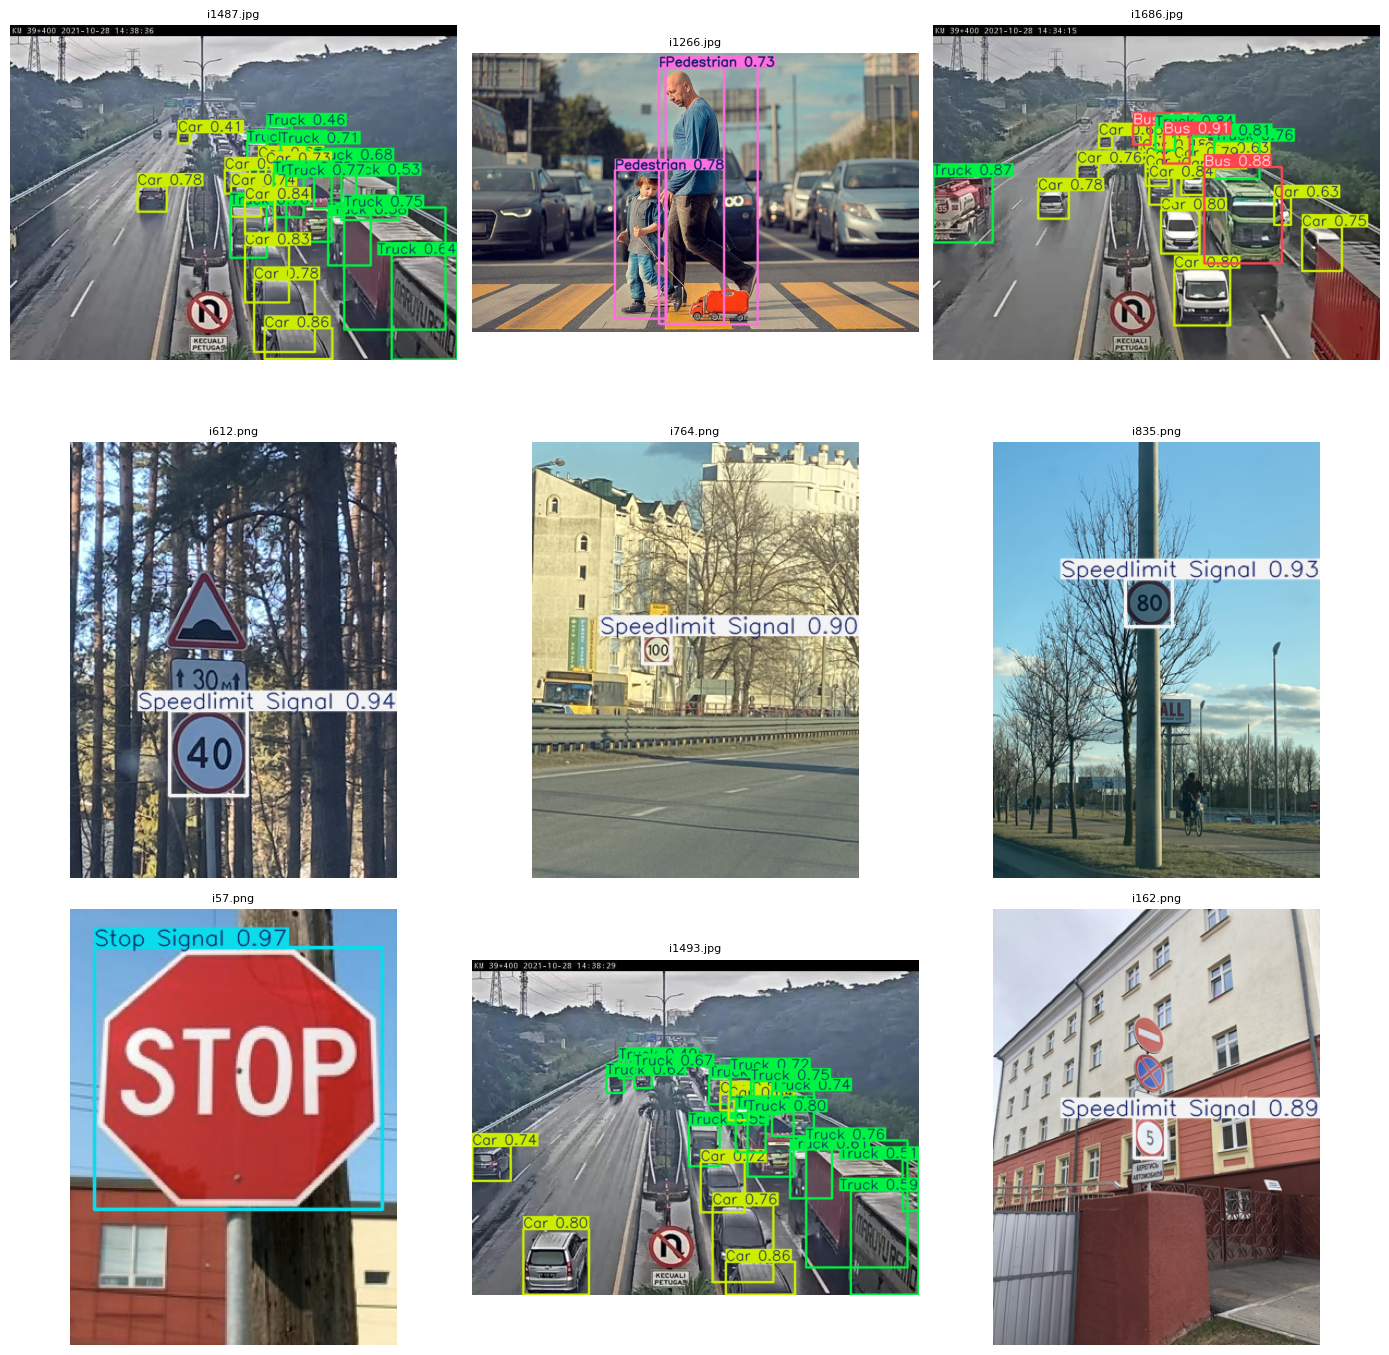

In [19]:
# ==========================================================
# 8) VISUALIZE RANDOM TEST PREDICTIONS
# ==========================================================
test_images = os.listdir(TEST_DIR)
sample_test_imgs = random.sample(test_images, 9)

plt.figure(figsize=(14, 14))

for i, img_name in enumerate(sample_test_imgs):
    img_path = os.path.join(TEST_DIR, img_name)

    result = best_model.predict(img_path, conf=0.4, imgsz=640, verbose=False)[0]

    annotated_img = result.plot()
    annotated_img = cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB)

    plt.subplot(3, 3, i+1)
    plt.imshow(annotated_img)
    plt.title(img_name, fontsize=8)
    plt.axis("off")

plt.tight_layout()
plt.show()